<a href="https://colab.research.google.com/github/defneerencan/defneerencan-Defne-Erencan-DSA210/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/defneerencan/defneerencan-Defne-Erencan-DSA210/refs/heads/main/akbank_clean_categorized_v3.csv"

df = pd.read_csv(url)
df.head()


,date,amount,balance,category
0,2024-09-26,-350.00,2802.86,Restaurant
1,2024-09-26,-338.02,2160.41,Food Delivery
2,2024-09-26,-300.00,2502.86,Bank Transfer
3,2024-09-26,-4.22,2498.64,Bank Transfer
4,2024-09-26,-0.21,2498.43,Bank Transfer


In [4]:
df.isnull().sum()


,0
date,0
amount,0
balance,0
category,0


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1672 non-null   datetime64[ns]
 1   amount    1672 non-null   float64       
 2   balance   1672 non-null   float64       
 3   category  1672 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 52.4+ KB


In [6]:
df['amount'] = df['amount'].astype(float)
df['balance'] = df['balance'].astype(float)


In [7]:
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df.head()


,date,amount,balance,category,month,weekday,is_weekend
0,2024-09-26,-350.00,2802.86,Restaurant,9,3,False
1,2024-09-26,-338.02,2160.41,Food Delivery,9,3,False
2,2024-09-26,-300.00,2502.86,Bank Transfer,9,3,False
3,2024-09-26,-4.22,2498.64,Bank Transfer,9,3,False
4,2024-09-26,-0.21,2498.43,Bank Transfer,9,3,False


In [8]:
def season(row):
    if row['month'] in [6, 7, 8, 9]:
        return "Summer"
    else:
        return "School"

df['term'] = df.apply(season, axis=1)
df.head()


,date,amount,balance,category,month,weekday,is_weekend,term
0,2024-09-26,-350.00,2802.86,Restaurant,9,3,False,Summer
1,2024-09-26,-338.02,2160.41,Food Delivery,9,3,False,Summer
2,2024-09-26,-300.00,2502.86,Bank Transfer,9,3,False,Summer
3,2024-09-26,-4.22,2498.64,Bank Transfer,9,3,False,Summer
4,2024-09-26,-0.21,2498.43,Bank Transfer,9,3,False,Summer


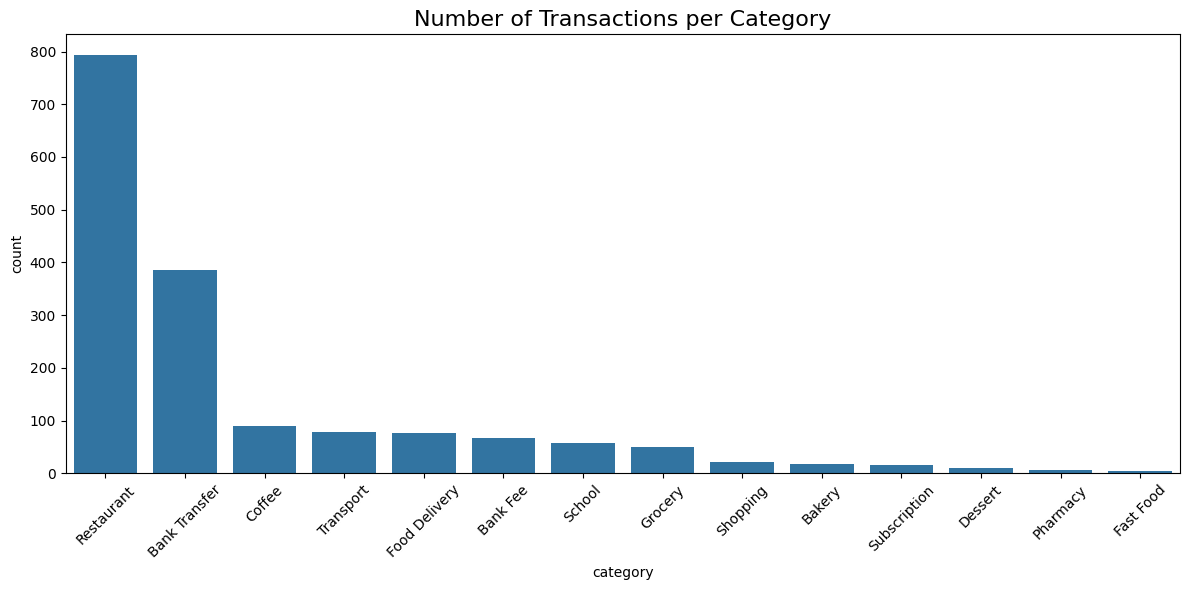

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title("Number of Transactions per Category", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


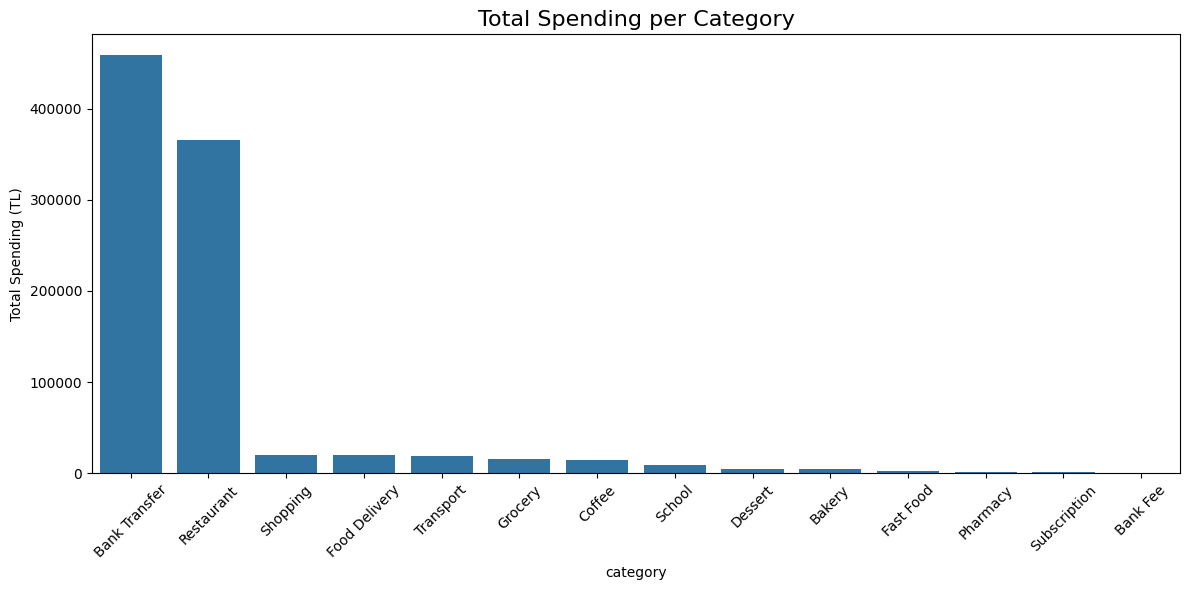

In [10]:
category_spending = df.groupby('category')['amount'].sum().abs().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_spending.index, y=category_spending.values)
plt.title("Total Spending per Category", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Total Spending (TL)")
plt.tight_layout()
plt.show()


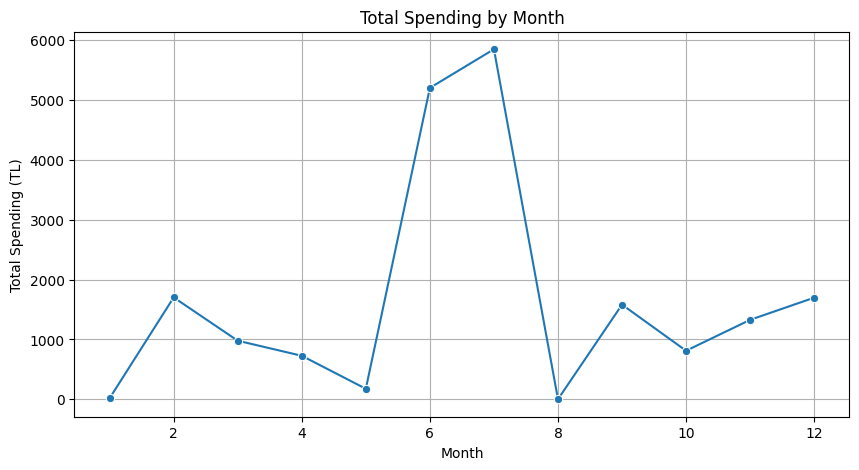

In [11]:
monthly = df.groupby('month')['amount'].sum().abs()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.title("Total Spending by Month")
plt.xlabel("Month")
plt.ylabel("Total Spending (TL)")
plt.grid()
plt.show()


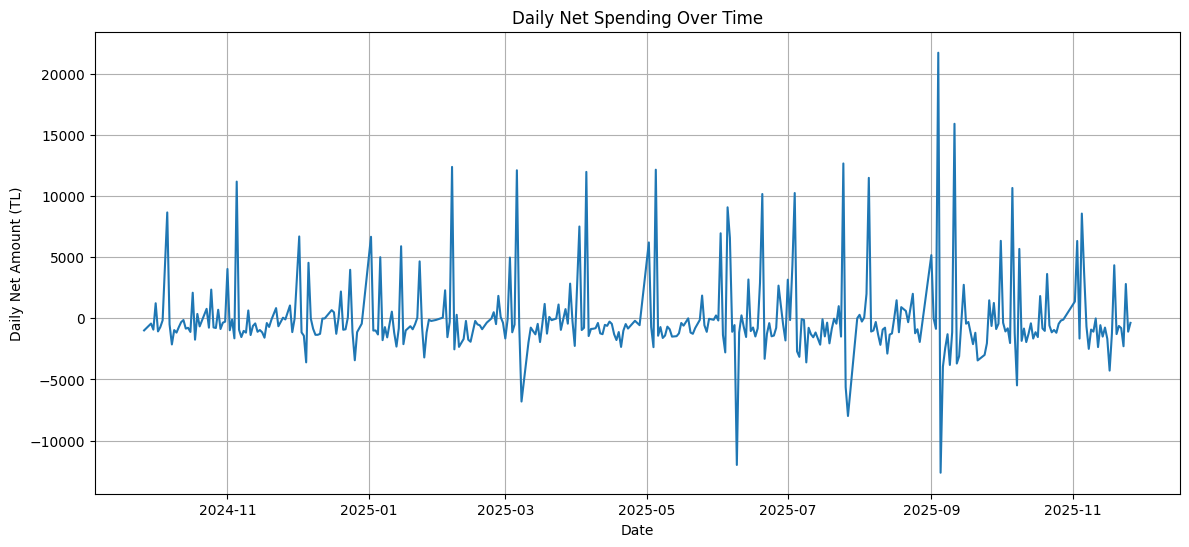

In [12]:
daily = df.groupby('date')['amount'].sum()

plt.figure(figsize=(14,6))
sns.lineplot(x=daily.index, y=daily.values)
plt.title("Daily Net Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Net Amount (TL)")
plt.grid()
plt.show()


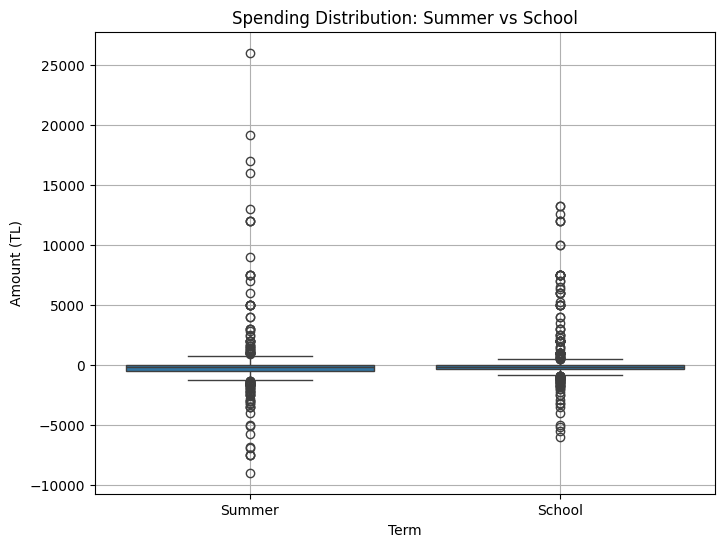

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='term', y='amount')
plt.title("Spending Distribution: Summer vs School")
plt.xlabel("Term")
plt.ylabel("Amount (TL)")
plt.grid()
plt.show()


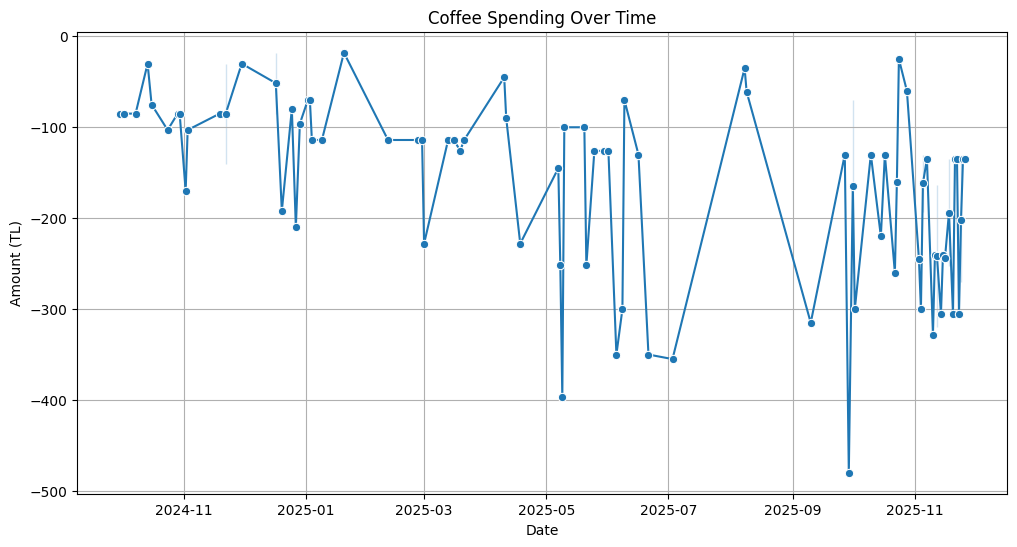

In [14]:
coffee = df[df['category'] == 'Coffee']

plt.figure(figsize=(12,6))
sns.lineplot(data=coffee, x='date', y='amount', marker='o')
plt.title("Coffee Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Amount (TL)")
plt.grid()
plt.show()


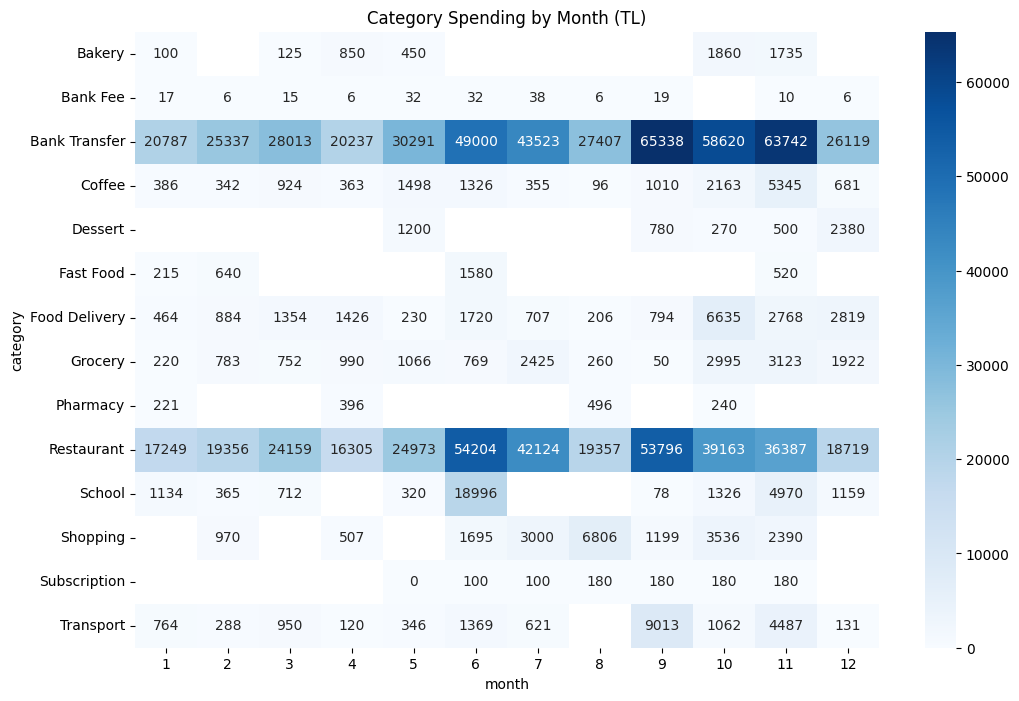

In [15]:
pivot = df.pivot_table(values='amount', index='category', columns='month', aggfunc='sum').abs()

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title("Category Spending by Month (TL)")
plt.show()


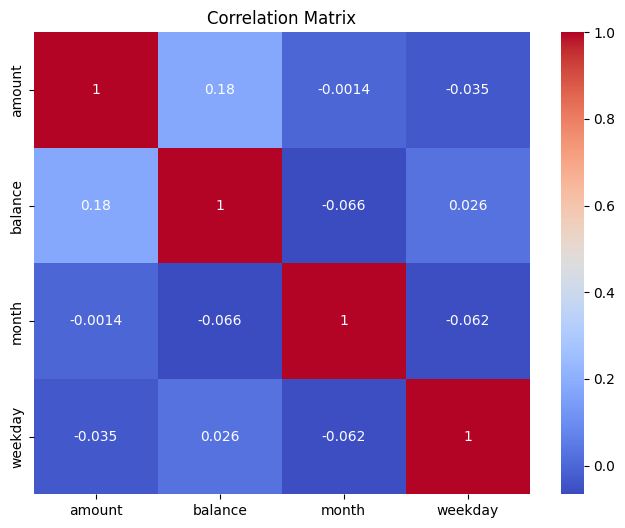

In [16]:
numeric_df = df[['amount', 'balance', 'month', 'weekday']]
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [17]:
from scipy.stats import ttest_ind

summer = df[df['term'] == "Summer"]['amount'].abs()
school = df[df['term'] == "School"]['amount'].abs()

t_stat, p_val = ttest_ind(summer, school, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("→ The difference is statistically significant. Reject H0.")
else:
    print("→ No significant difference. Fail to reject H0.")


T-statistic: 4.076912930163896
P-value: 5.0697067945887665e-05
→ The difference is statistically significant. Reject H0.


In [18]:
# Calculate median coffee amount
median_coffee = coffee['amount'].abs().median()

# High coffee days vs normal days
high = coffee[coffee['amount'].abs() > median_coffee]['amount'].abs()
normal = coffee[coffee['amount'].abs() <= median_coffee]['amount'].abs()

t_stat, p_val = ttest_ind(high, normal, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("→ Coffee spending shows significant increases in certain periods.")
else:
    print("→ No statistically significant change in coffee spending.")


T-statistic: 11.24076991603172
P-value: 1.2893028946273026e-15
→ Coffee spending shows significant increases in certain periods.


In [19]:
home_months = [1, 6, 7, 8]

home_spending = df[df['month'].isin(home_months)]['amount'].abs()
uni_spending = df[~df['month'].isin(home_months)]['amount'].abs()

t_stat, p_val = ttest_ind(home_spending, uni_spending, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("→ Spending is significantly different between home and university periods.")
else:
    print("→ No significant difference detected.")


T-statistic: 2.29259343464737
P-value: 0.02211935800954695
→ Spending is significantly different between home and university periods.
